In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = pd.read_excel("data1-telematics_syn_orignal data.xlsx", index_col=0)

# age groups
age_dict = {
    'young_drivers': {'age_bracket': '16-25', 'bins': [16, 25]},
    'middle_drivers': {'age_bracket': '26-40', 'bins': [26, 40]},
    'mature_drivers': {'age_bracket': '41-60', 'bins': [41, 60]},
    'senior_drivers': {'age_bracket': '61+', 'bins': [61, df['Insured.age'].max()]}
}
age_bin_list = [16]
age_bin_list.extend([age_dict[x]['bins'][1] for x in age_dict])
age_bin_labels = [age_dict[x]['age_bracket'] for x in age_dict]
df['age_group'] = pd.cut(df['Insured.age'], bins=age_bin_list, labels=age_bin_labels, include_lowest=True)

# credit score groups
credit_score_bins = [300, 600, 700, 800, 850]
credit_score_labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['credit_score_group'] = pd.cut(df['Credit.score'], bins=credit_score_bins, labels=credit_score_labels, include_lowest=True)

# annual mileage groups
annual_miles_bins = [0, 10000, 15000, 20000, df['Annual.miles.drive'].max()]
annual_miles_labels = ['0-10k', '10k-15k', '15k-20k', '20k+']
df['annual_miles_group'] = pd.cut(df['Annual.miles.drive'], bins=annual_miles_bins, labels=annual_miles_labels, include_lowest=True)

# car age groups
car_age_bins = [0, 5, 10, 15, df['Car.age'].max()]
car_age_labels = ['0-5', '6-10', '11-15', '15+']
df['car_age_group'] = pd.cut(df['Car.age'], bins=car_age_bins, labels=car_age_labels, include_lowest=True)

# years no claims groups
years_noclaims_bins = [0, 2, 4, 6, df['Years.noclaims'].max()]
years_noclaims_labels = ['0-2', '3-4', '5-6', '6+']
df['years_noclaims_group'] = pd.cut(df['Years.noclaims'], bins=years_noclaims_bins, labels=years_noclaims_labels, include_lowest=True)


In [6]:
df.dtypes

Insured.age                  int64
Insured.sex                 object
Car.age                      int64
Marital                     object
Car.use                     object
Credit.score                 int64
Region                      object
Annual.miles.drive         float64
Years.noclaims               int64
Territory                    int64
Annual.pct.driven          float64
Total.miles.driven         float64
Pct.drive.mon              float64
Pct.drive.tue              float64
Pct.drive.wed              float64
Pct.drive.thr              float64
Pct.drive.fri              float64
Pct.drive.sat              float64
Pct.drive.sun              float64
Pct.drive.2hrs             float64
Pct.drive.3hrs             float64
Pct.drive.4hrs             float64
Pct.drive.wkday            float64
Pct.drive.wkend            float64
Pct.drive.rush am          float64
Pct.drive.rush pm          float64
Avgdays.week               float64
Accel.06miles                int64
Accel.08miles       

/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


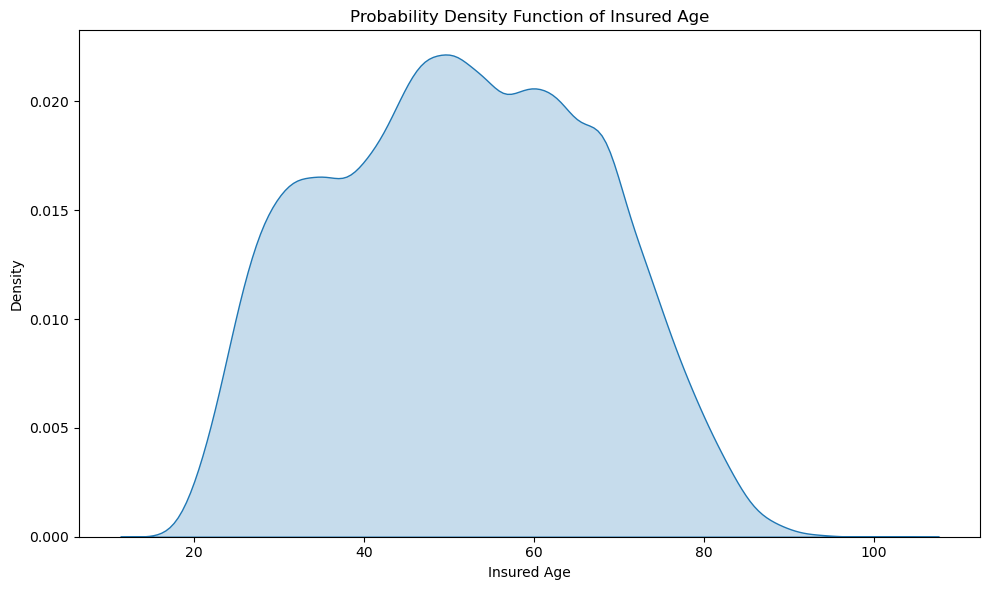

In [7]:
# Plot PDF of Insured Age
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Insured.age'], fill=True)
plt.title('Probability Density Function of Insured Age')
plt.xlabel('Insured Age')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('pdf_insured_age.png', dpi=300)
plt.show()


/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


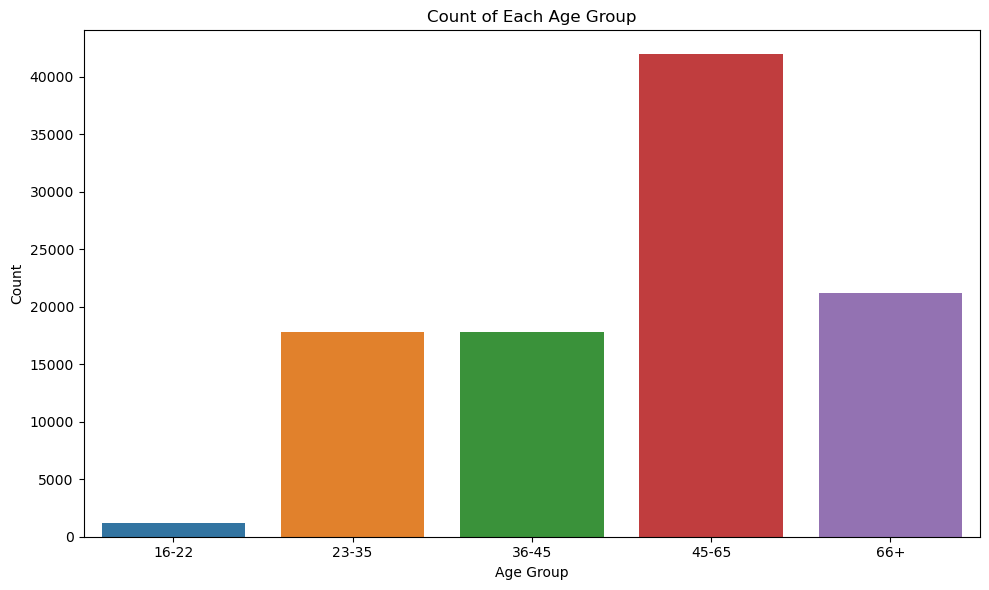

In [9]:
# Define age groups based on life stages
bins_age = [16, 22, 35, 45, 65, df['Insured.age'].max()]
labels_age = ['16-22', '23-35', '36-45', '45-65', '66+']
df['age_group'] = pd.cut(df['Insured.age'], bins=bins_age, labels=labels_age, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, order=labels_age)
plt.title('Count of Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('count_age_group.png', dpi=300)
plt.show()

/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


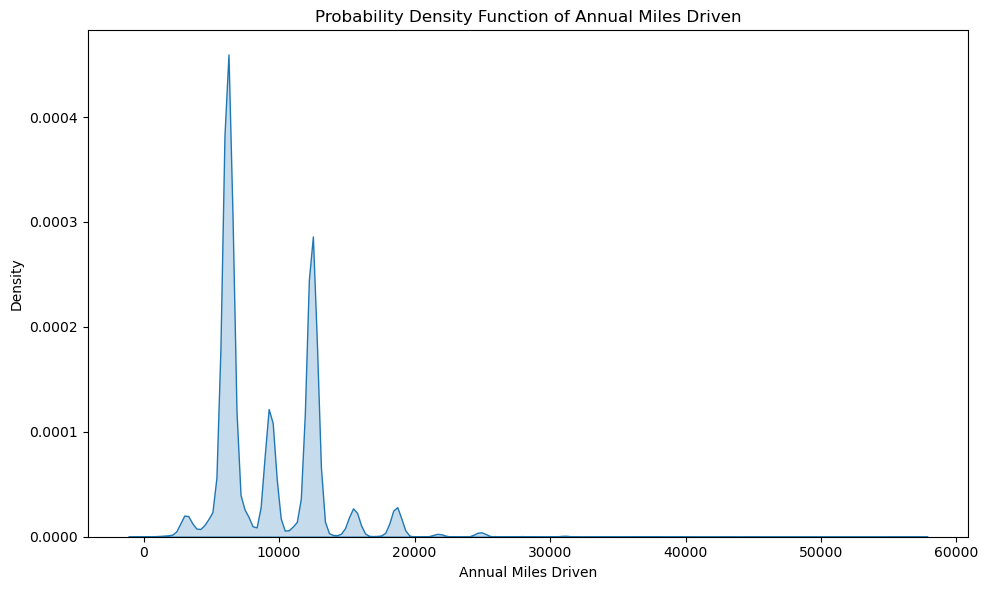

In [10]:
# Plot PDF of Annual Miles Driven
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Annual.miles.drive'], fill=True)
plt.title('Probability Density Function of Annual Miles Driven')
plt.xlabel('Annual Miles Driven')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('pdf_annual_miles.png', dpi=300)
plt.show()

/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


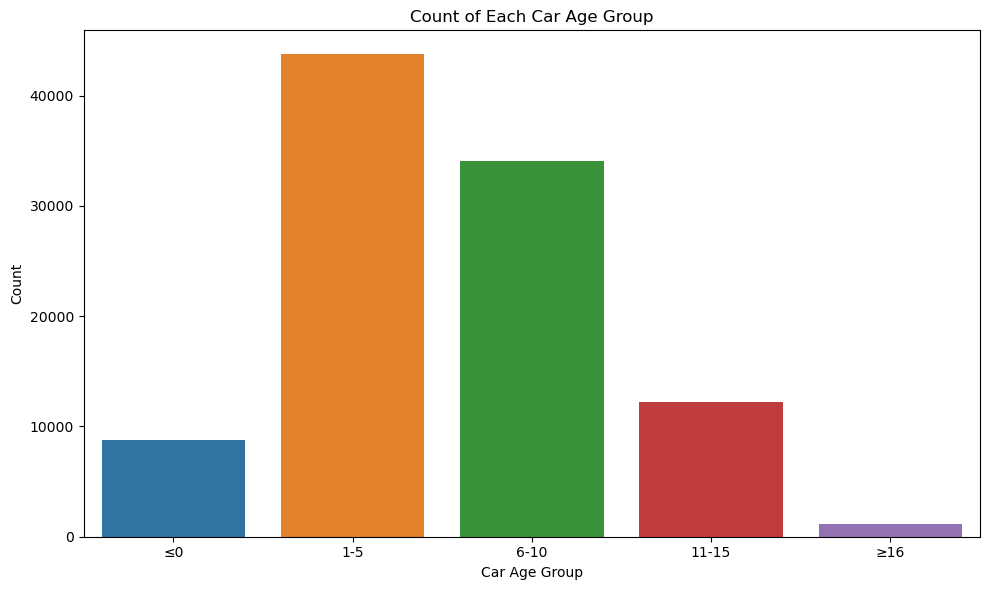

In [11]:
# Car age groups
bins_car_age = [-1, 0, 5, 10, 15, df['Car.age'].max()]
labels_car_age = ['≤0', '1-5', '6-10', '11-15', '≥16']
df['car_age_group'] = pd.cut(df['Car.age'], bins=bins_car_age, labels=labels_car_age, include_lowest=True)

# Distribution of car age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='car_age_group', data=df, order=labels_car_age)
plt.title('Count of Each Car Age Group')
plt.xlabel('Car Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('count_car_age_group.png', dpi=300)
plt.show()

/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


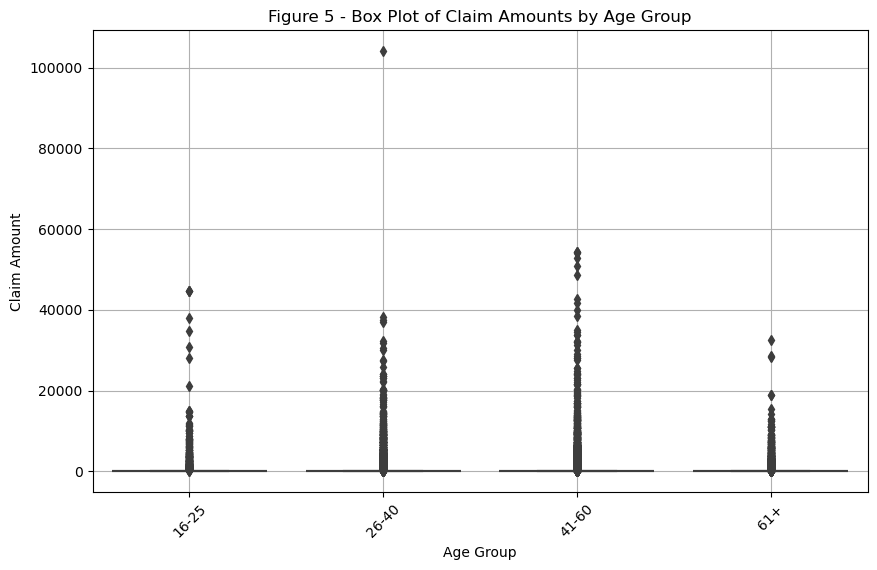

In [3]:
# Box Plot of Claim Amounts by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='AMT_Claim', data=df)
plt.title('Figure 5 - Box Plot of Claim Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


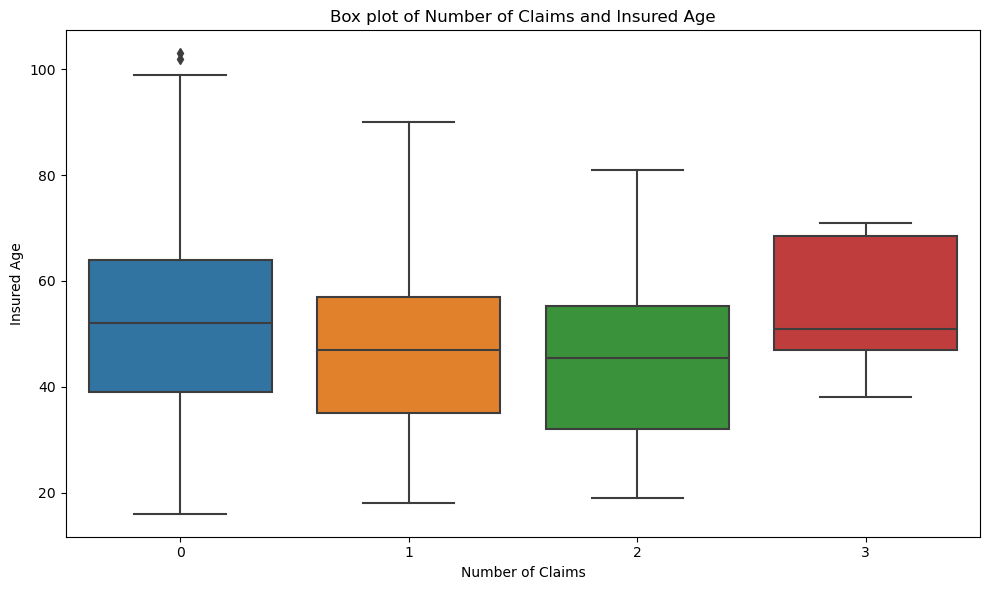

In [12]:
# Box plot of 'Insured.age' and 'NB_Claim'
plt.figure(figsize=(10, 6))
sns.boxplot(x='NB_Claim', y='Insured.age', data=df)
plt.title('Box plot of Number of Claims and Insured Age')
plt.xlabel('Number of Claims')
plt.ylabel('Insured Age')
plt.tight_layout()
plt.savefig('boxplot_nb_claim_insured_age.png', dpi=300)
plt.show()

/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


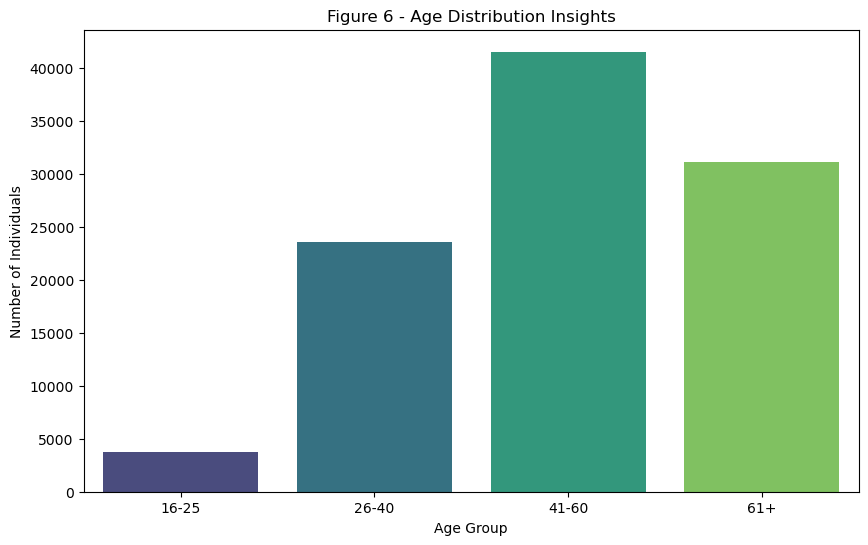

In [5]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='viridis', order=age_bin_labels)
plt.title('Figure 6 - Age Distribution Insights')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.show()


In [17]:
# Duplicate columns and handle them
df = df.loc[:, ~df.columns.duplicated()]

In [18]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 366 to 365
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Insured.age             100000 non-null  int64   
 1   Insured.sex             100000 non-null  object  
 2   Car.age                 100000 non-null  int64   
 3   Marital                 100000 non-null  object  
 4   Car.use                 100000 non-null  object  
 5   Credit.score            100000 non-null  int64   
 6   Region                  100000 non-null  object  
 7   Annual.miles.drive      100000 non-null  float64 
 8   Years.noclaims          100000 non-null  int64   
 9   Territory               100000 non-null  int64   
 10  Annual.pct.driven       100000 non-null  float64 
 11  Total.miles.driven      100000 non-null  float64 
 12  Pct.drive.mon           100000 non-null  float64 
 13  Pct.drive.tue           100000 non-null  float64 
 14  Pct.drive.

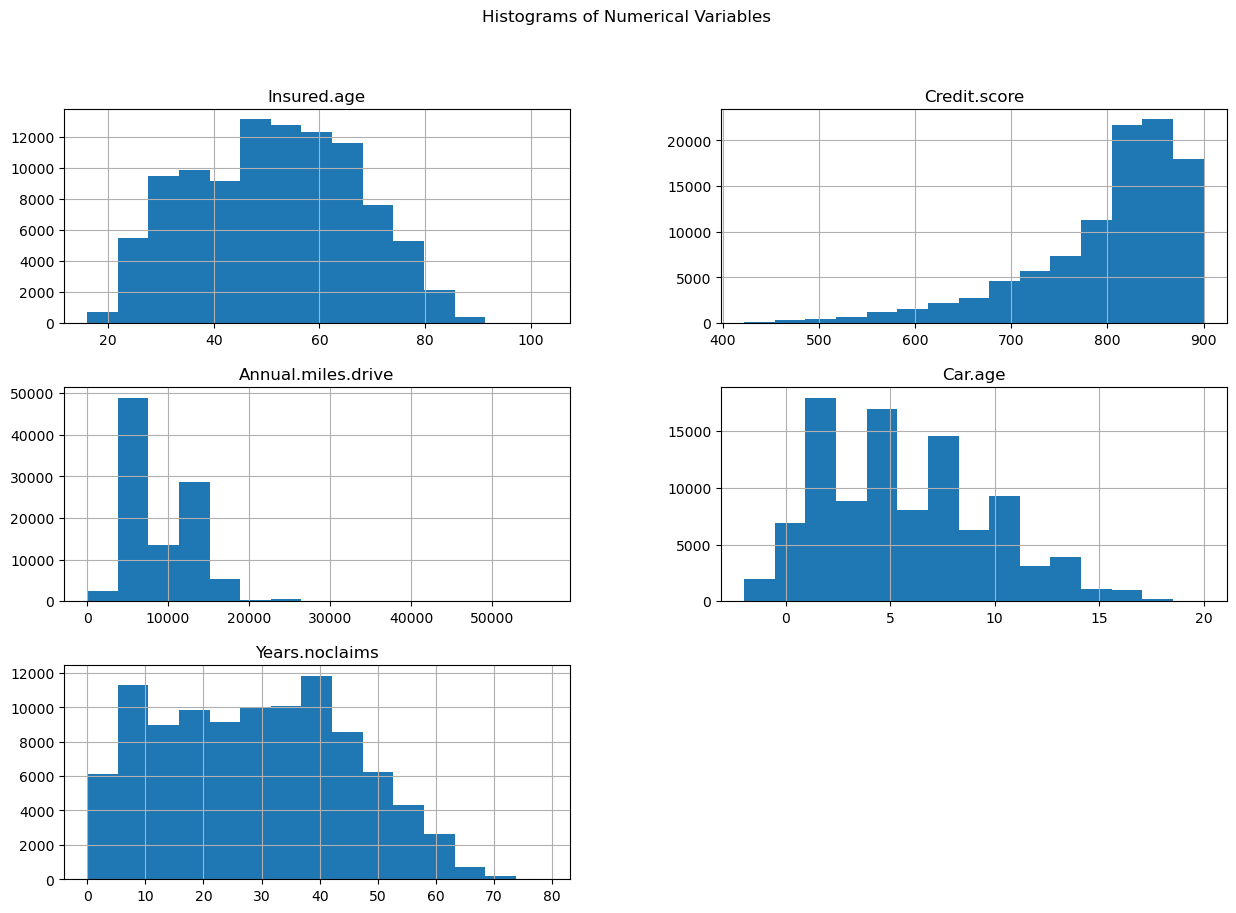

In [19]:
# Plot histograms for numerical variables
numerical_cols = ['Insured.age', 'Credit.score', 'Annual.miles.drive', 'Car.age', 'Years.noclaims']
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

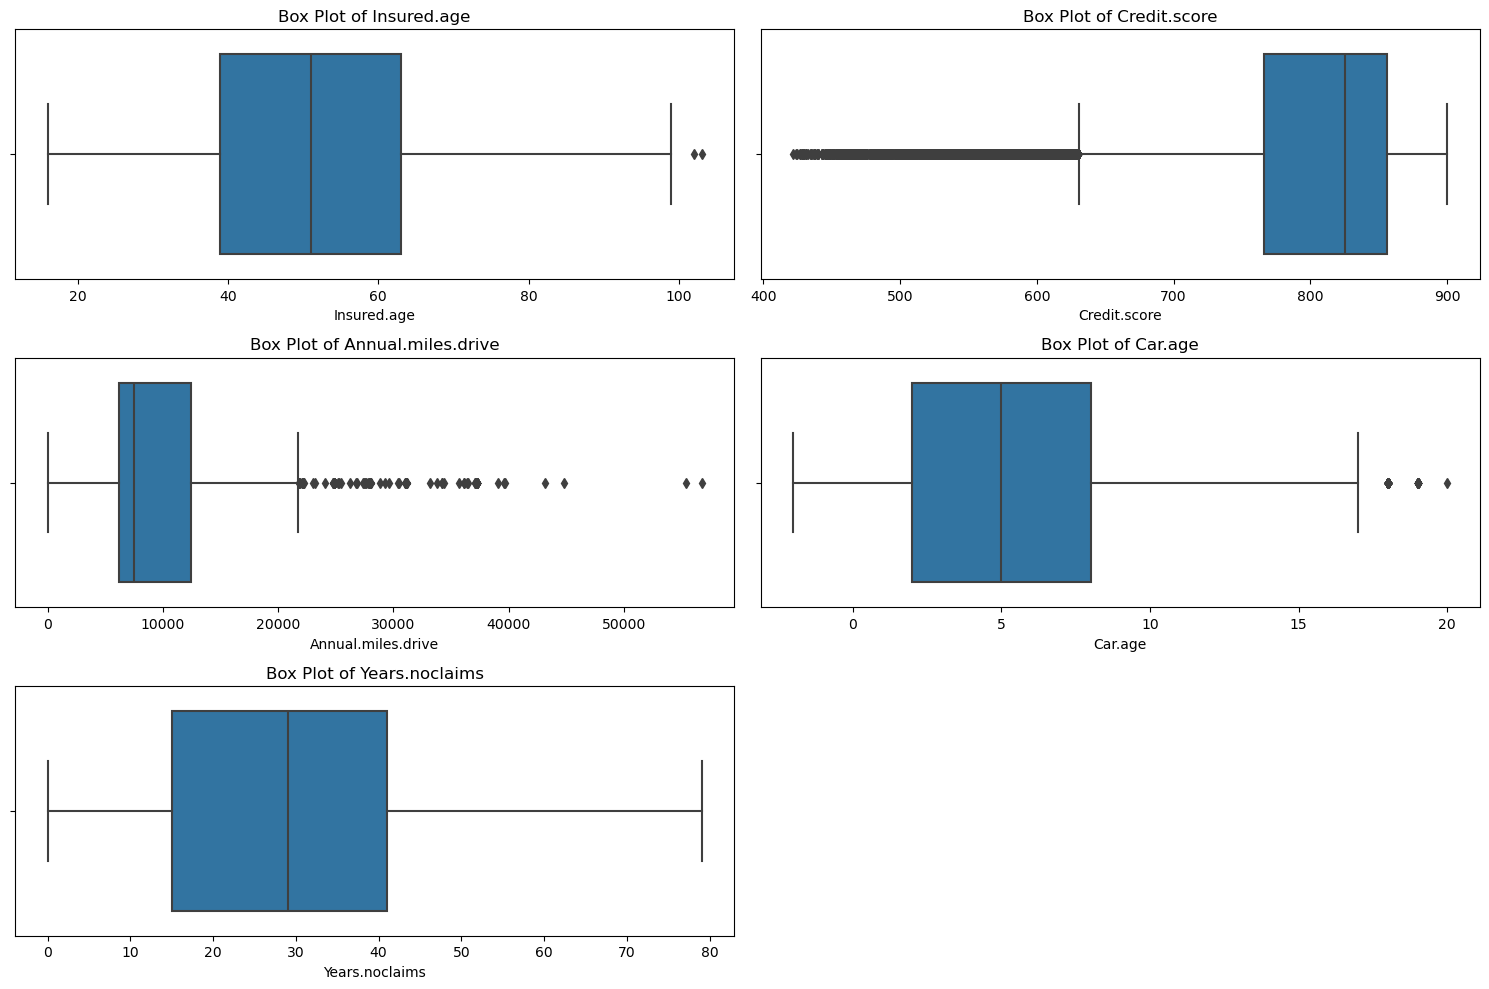

In [20]:
# Box plots for numerical variables to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

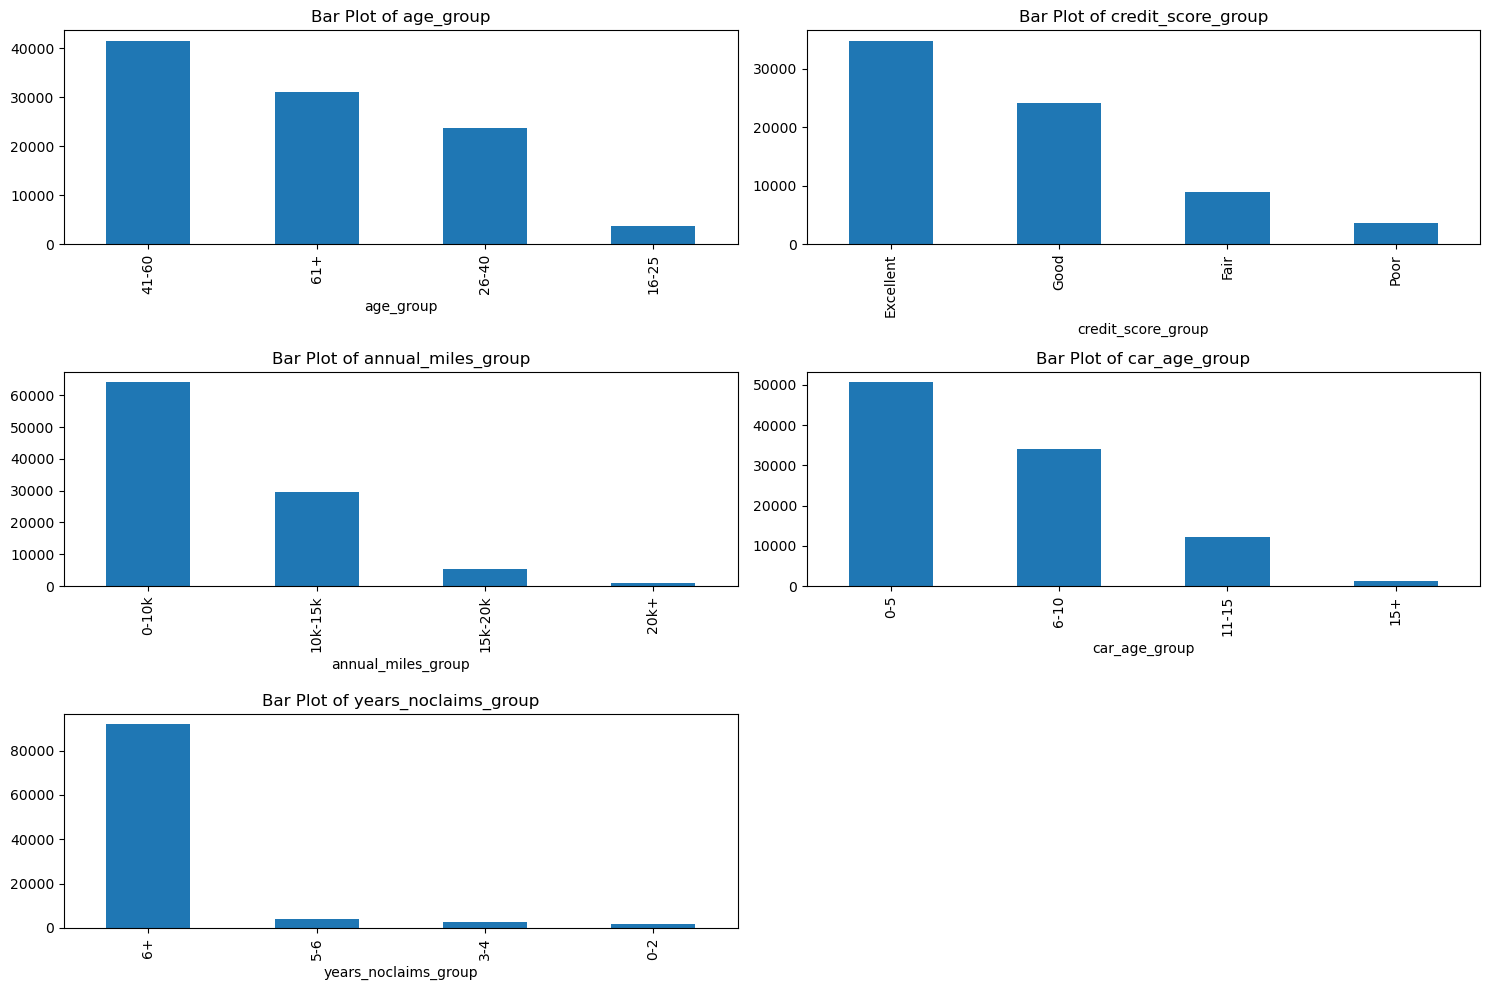

In [21]:
# Bar plots for categorical variables
categorical_cols = ['age_group', 'credit_score_group', 'annual_miles_group', 'car_age_group', 'years_noclaims_group']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
plt.tight_layout()
plt.show()

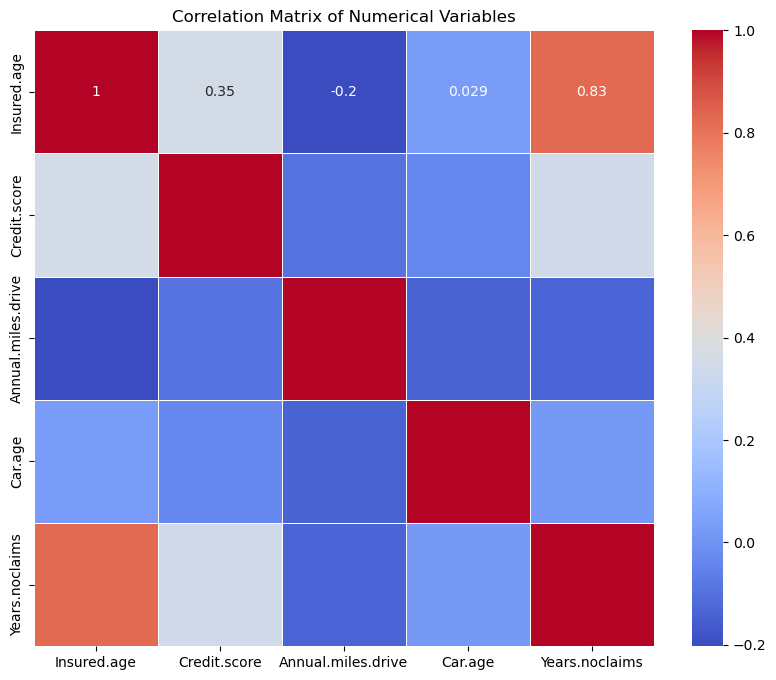

In [22]:
# Correlation matrix and heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joco/anaconda3/envs/graphmining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

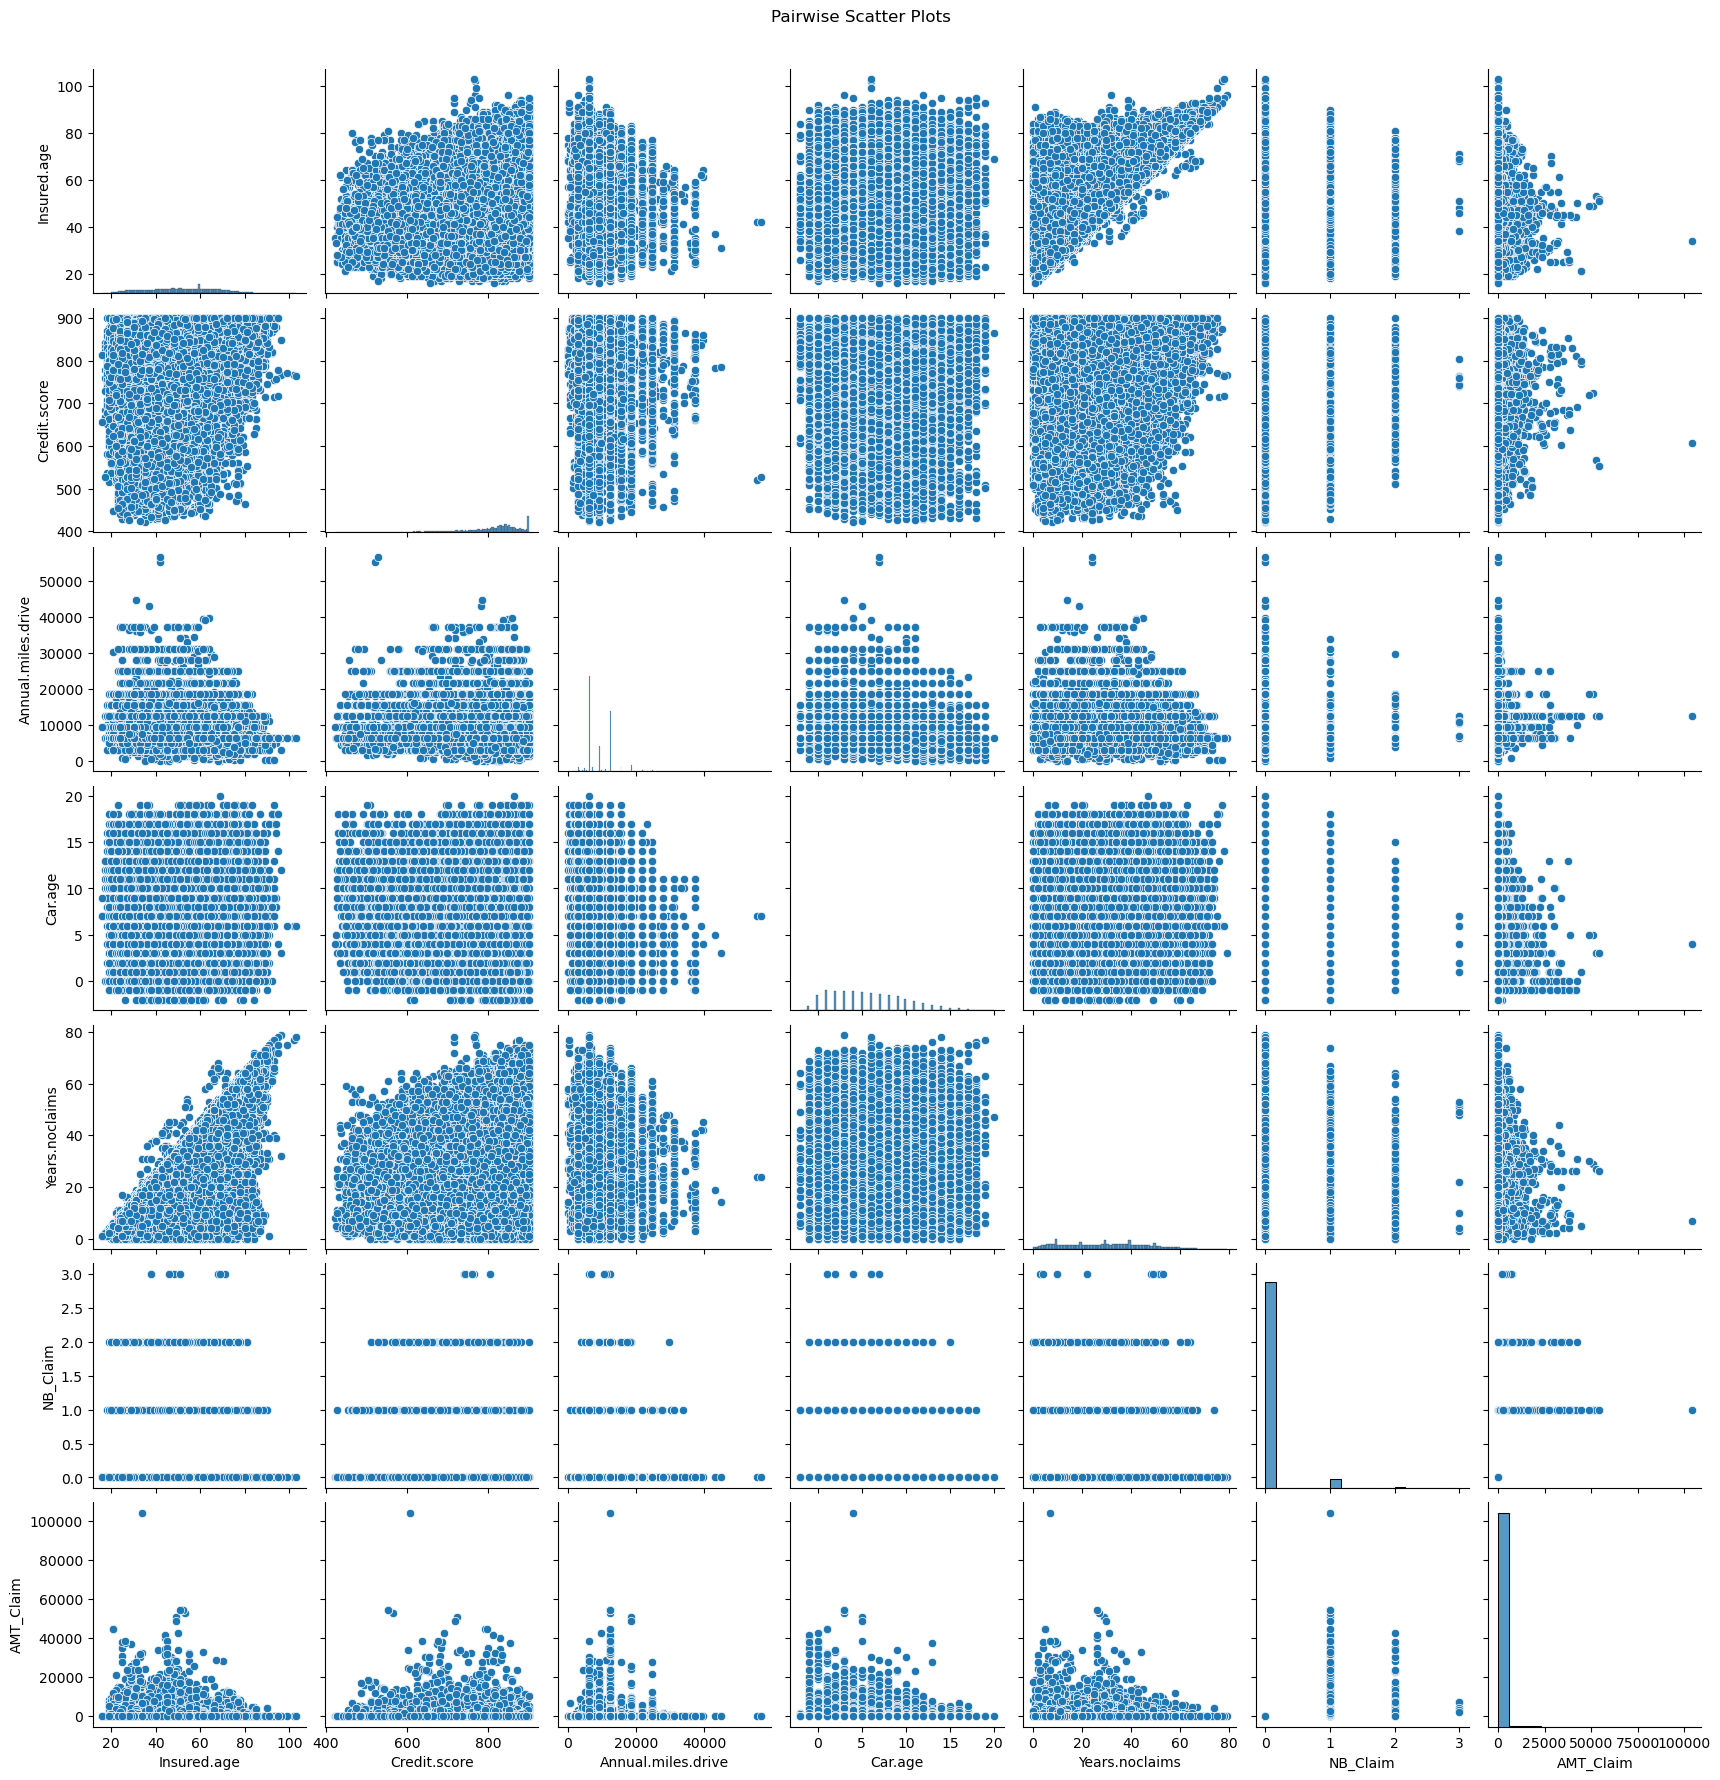

In [23]:

# Pairwise scatter plots
sns.pairplot(df[numerical_cols + ['NB_Claim', 'AMT_Claim']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()